# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
!pip install keras

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install tensorflow

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [4]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

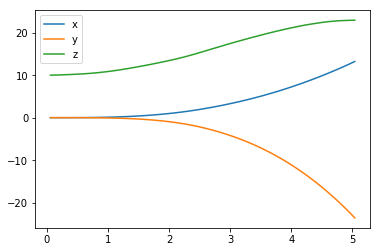

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

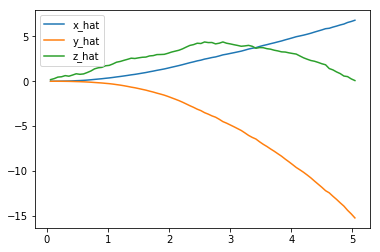

In [6]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

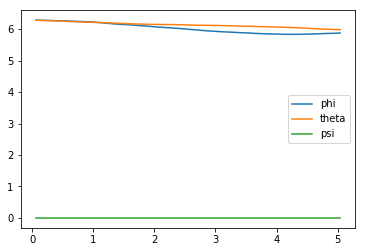

In [7]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

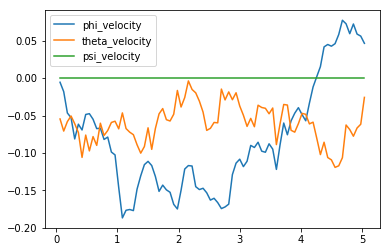

In [8]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

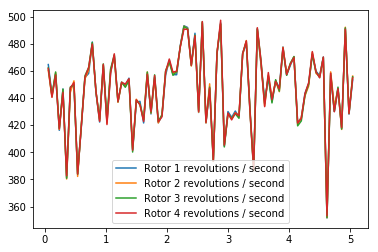

In [9]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [10]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 13.22245775 -23.59277434  22.9290058    5.8754359    5.98359017
   0.        ]
[  6.81507384 -15.26586366   0.07784693]
[ 0.04655665 -0.02574369  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [11]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 463.005 (best = 489.887), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [12]:
## TODO: Train your agent here.

from agents.agent import DDPG

runtime = 5.                                     # time limit of the episode
init_pose = np.array([1., 1., 30., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 1000
target_pos = np.array([3., 3., 30.])
task = Task(target_pos=target_pos, init_pose=init_pose, 
            init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=runtime)
agent = DDPG(task)

results = {}
rewards = []

cum_score = 0
total_reward = 0
best_score = -np.inf
step = 0

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step += 1
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state

        if done:
            total_reward += reward
            cum_score = total_reward/step
            if reward > best_score:
                best_score = reward
                
            results[i_episode] = {'ep':i_episode, 'time':task.sim.time, 
                                  'reward':reward, 'cum_score':cum_score, 'best_score':best_score,
                                  'pos_x':task.sim.pose[0],'pos_y':task.sim.pose[1],'pos_z':task.sim.pose[2], 
                                  'vel_x':task.sim.v[0],'vel_y':task.sim.v[1],'vel_z':task.sim.v[2], 'states':state}
            
            print("\rEp {:4d}, reward {:7.4f}, cumulative {:7.4f}, best {:7.4f}, position {:7.4f}, {:7.2f}, {:7.4f}"\
                  .format(i_episode, reward, cum_score, best_score, 
                          task.sim.pose[0], task.sim.pose[1], task.sim.pose[2]), end="")  # [debug]
            break
    sys.stdout.flush()
    
df_results = pd.DataFrame.from_dict(data=results, orient='index')
df_results.to_csv('results.csv')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Ep 1000, reward -309.8000, cumulative -277.3879, best 873.9000, position  0.9268,    1.87,  0.0000503

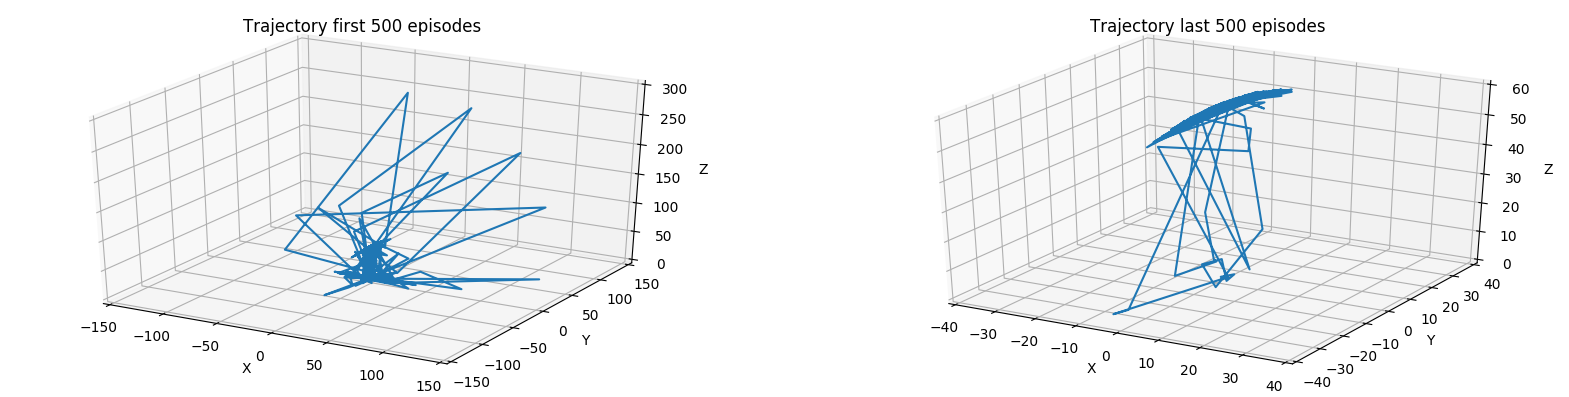

In [75]:
from mpl_toolkits.mplot3d import Axes3D

ep_lb = 0
ep_split = 500
ep_ub = 1000

fig = plt.figure(figsize=(20, 5), dpi=100)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x = df_results[(df_results['ep']>ep_lb) & (df_results['ep']<=ep_split)]['pos_x']
y = df_results[(df_results['ep']>ep_lb) & (df_results['ep']<=ep_split)]['pos_y']
z = df_results[(df_results['ep']>ep_lb) & (df_results['ep']<=ep_split)]['pos_z']
ax1.plot3D(x, y, z)
ax1.set_xlim([-150, 150])
ax1.set_ylim([-150, 150])
ax1.set_zlim([0, 300])
ax1.set(xlabel='X', ylabel='Y', zlabel='Z', title='Trajectory first 500 episodes')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x = df_results[(df_results['ep']>ep_split) & (df_results['ep']<=ep_ub)]['pos_x']
y = df_results[(df_results['ep']>ep_split) & (df_results['ep']<=ep_ub)]['pos_y']
z = df_results[(df_results['ep']>ep_split) & (df_results['ep']<=ep_ub)]['pos_z']
ax2.plot3D(x, y, z, label='Trajectory last 500 episodes')
ax2.set_xlim([-40, 40])
ax2.set_ylim([-40, 40])
ax2.set_zlim([0, 60])
ax2.set(xlabel='X', ylabel='Y', zlabel='Z', title='Trajectory last 500 episodes')


plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0.5, 1.0, 'Episode time')

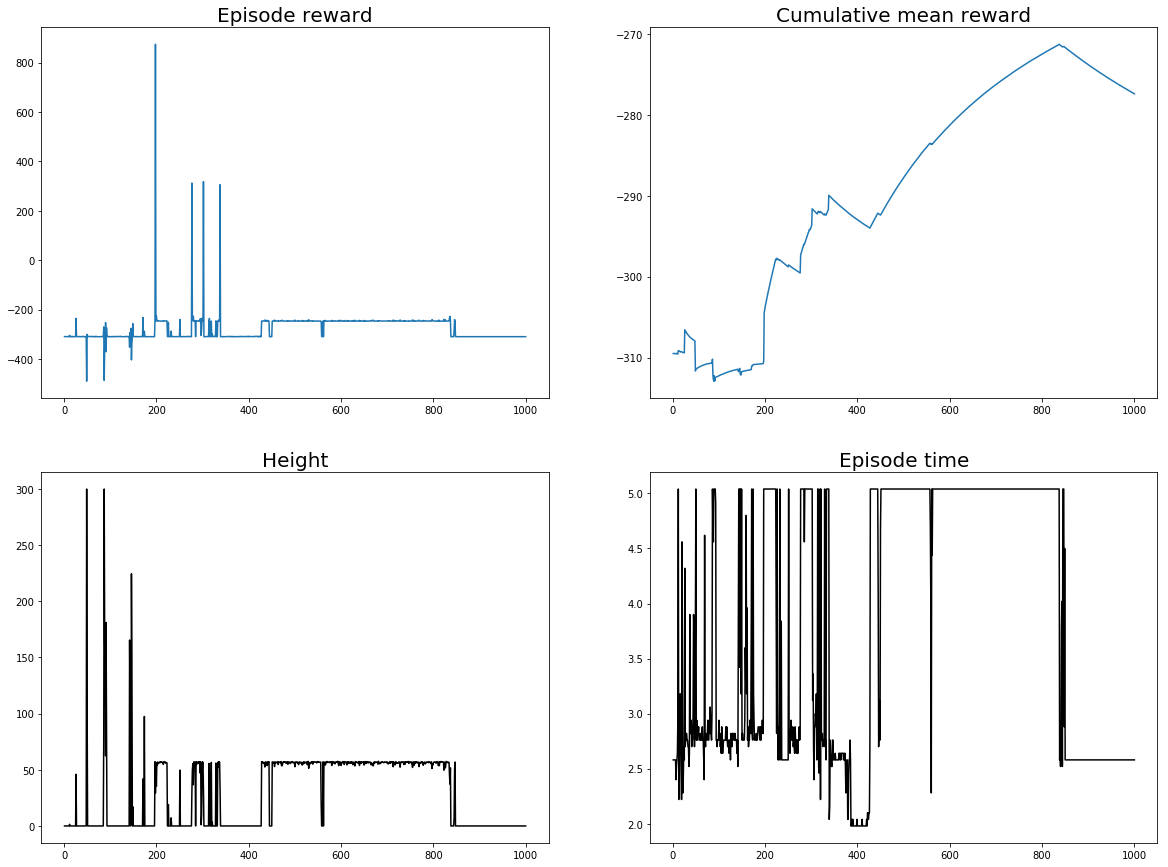

In [43]:
## TODO: Plot the rewards.
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(df_results['ep'], df_results['reward'])
ax1.set_title('Episode reward', fontsize=20)

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(df_results['ep'], df_results['cum_score'])
ax2.set_title('Cumulative mean reward', fontsize=20)

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(df_results['ep'], df_results['pos_z'], color='black')
ax3.set_title('Height', fontsize=20)

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(df_results['ep'], df_results['time'], color='black')
ax4.set_title('Episode time', fontsize=20)


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task I set out for the quadcopter is to take off and hoover at certain coordinates. However, I have specified the task many, many times over. In the end, I settled on a reward structure where there is at first only a reward for flying, with a continuous reward for closer proximity to the z-coordinate (height). Then, when in proximity of the z-coordinate (<5), a large constant reward is given plus a continuous duration reward and small continuous reward for x- and y-proximity. Finally, another large constant reward is given when in proximity to all coordinates, as well as another continuous duration reward. The main reason for this reward structure is that I encountered many runs where the quadcopter did not really take off (sometimes even under the exact same task and hyperparameters). Key seems to be to have relatively large constant rewards for different "states" (e.g., flying at a certain height) and relatively smaller continuous rewards that pull the quadcopter towards each state (as if creating a clearly sloped mountain for the DDPG agent).

Again, I have tried many, many other specifications. From slightly more complex reward structures, e.g. with a negative continuous reward for the difference between distance and velocity (the idea being it should slow down when close to the target) and with negative continuous rewards for Euler angles (to prevent rolling/wobbling), to even trying to fit the task on a discrete action space (for a DQN). However, I think such more complex approaches require much more training time (days to weeks on end, I would guess), especially when hyperparameters still need adjustment.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I have mainly used the provided DDPG architecture. After changing several parts back and forth, I settled on:
- **DDPG agent and Actor-Critic NNs**: increased the number of nodes of the dense layers from 32 to 324 and from 64 to 108, and added batch normalization in between. The batch normalization helped to speed up the performance a bit, but I did not discern any improvements in the quadcopter behavior. The motivation for the increased layer sizes was that the task at hand seems very complex with many interrelated inputs and the quadcopter did not take off in the beginning. Although this seemed to work better, it might not have been necessary since I drastically simplified the task later on. I also increased the discount factor (gamma) to .999 to increase the relevance of past experiences.
-	**Replay buffer**: increased batch size to 256 to get larger experience samples. Again, the motivation is the complexity of the task to be learned. A larger sample generally results in more stable updating of the weights (thus reducing the risk of overfitting on specific nodes and getting stuck in local minima), especially when there are more (complex) features to be learned.
-	**Noise process**: substantially increased sigma (0.3) and decreased theta (0.06) to draw form a wider distribution and have slower mean reversion, respectively. This was done to increase exploration since the quadcopter did not take off in the beginning. 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The overall task of taking off and hoovering at specific coordinates seems to be quite hard. However, the quadcopter apparently already learned to fly after the first 200 episodes and from then on, the cumulative mean reward steadily increases. After about 500 episodes, the quadcopter even stays in the air for a couple hundred episodes. Yet, it never really seems to find the target height, despite the fact that the continuous reward is highest at this point (the quadcopter stays around a height of 50 while 30 is optimal). In this run, it therefore never gets to the next phase of finding the right x- and y-coordinates (in previous runs under slightly different settings it did seem to learn this). I am not really sure what triggered the quadcopter in the last few episodes to stay on the ground.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part was getting some results to go on. Also, it can be very frustrating when changing something back and forth, only to get entirely different results and spending many hours reviewing code for possible mistakes or typos. Although at times it was really frustrating, the aha moments (and some determinism) kept me going. In the process of changing the setup again and again, I learned a lot (even about aerodynamics). Moreover, the idea to teach a quadcopter to fly using RL is very cool. Actually, I am very eager to spend even more time on this and incorporate some ideas that were not included in this last run, but unfortunately time is a constraint.

